# Chapter 02

In [1]:
import pint
ureg = pint.UnitRegistry()

import numpy as np

from sympy import *
init_printing()

# force plots to display in notebook, not new window
%matplotlib inline

## Probelm 02.42

A published study of a chemical reaction, A->P indicates that if the reactor initially contains A at a concentration of Ca0 (g/L) and the raction temperature, T, is kept constant, then the concentration of P in the reactor increases with time according to the formula

$$ C_p (g/L) = C_{a0} (1 - e^{-kt}) $$

The *rate constant*, $k(s^{-1})$, is reportedly a function only of the reaction temperature. To test this finding, the reaction is run in four different laboratories. The reported experimental results are given below.

In [2]:
# t is in (s)
tdata = [0, 10, 20, 30, 60, 120, 240, 360, 480, 600]

# C_p is in (g/L)
# T = 275 C; C_a0 = 4.83
C_a01 = 4.83
data1 = [0.0, 0.287, 0.594, 0.871, 1.51, 2.62, 3.91, 4.30, 4.62, 4.68]

# T = 275 C; C_a0 = 12.2
C_a02 = 12.2
data2 = [0, 1.21, 2.43, 3.38, 5.89, 8.90, 11.2, 12.1, 12.1, 12.2]

# T = 275 C; C_a0 = 5.14
C_a03 = 5.14
data3 = [0.0, 0.310, 0.614, 0.885, 1.64, 2.66, 3.87, 4.61, 4.89, 5.03]

# T = 275 C; C_a0 = 3.69
C_a04 = 3.69
data4 = [0.0, 0.245, 0.465, 0.670, 1.20, 2.06, 3.03, 3.32, 3.54, 3.59]

(a) What plot would yield a straight line if the given equation is correct?

$$ C_p  = C_{a0} (1 - e^{-kt}) $$
$$ C_p / C_{a0}  =  (1 - e^{-kt}) $$
$$ 1 - C_p / C_{a0} = e^{-kt} $$
$$ ln (1 - C_p / C_{a0}) = -kt $$

Plot $ln (1 - C_p / C_{a0})$ vs $t$ where $slope = -k$ and there is no intercept

(b) Enter the given data into a spreadsheet. For each data set ($C_p$ versus $t$), generate the plot of part (a) and determine the corresponding value of $k$. Your spreadsheet program probably has a built-in function to perform a linear regression on the data in two specified columns).

## Solution

It would be better to create a function that could handle this instead of copying the code 4 times, but I worked through this and did not do much revision

```python
def function findk(tdata, Cpdata, C_a0):
    ...
    return (-slope)
```

#### Lab 1 Data

In [3]:
# define function for y values
y = Function('y')
Cp, C_a0 = symbols('Cp C_a0')

y = ln(1 - Cp/C_a0)
y

In [4]:
# create array of y values substituting data#[i] for Cp and C_a0# for C_a0
y1 = []
for i in range(10):
    y1.append(y.subs([(C_a0, C_a01), (Cp, data1[i])]))

In [5]:
# calculate A.1-3 equations from given data
# assuming correct data types and same dimensions
sx = 0
for t in tdata:
    sx += t
sx = sx/len(tdata)

sxx = 0
for t in tdata:
    sxx += t**2
sxx = sxx/len(tdata)

sy = 0
for l in y1:
    sy += l
sy = sy/len(y1)

sxy = 0
for i in range(len(y1)):
    sxy += tdata[i] * y1[i]
sxy = sxy/len(tdata)

# find slope and intercept of best fit line (least squares)
# use equations A.1-4 and A.1-5
f = Function('f')
x = symbols('x')

a = (sxy - sx*sy)/(sxx - sx**2)
#b = (sxx*sy - sxy*sx)/(sxx - sx**2)
b = 0

# define and print function
f = a * x + b
f

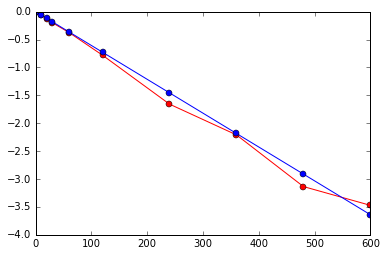

In [6]:
# plot data1 values with both lab1 and calc'd data
y2 = []
for i in range(10):
    y2.append(f.subs([(x, tdata[i])]))

import matplotlib.pyplot as plt

plt.plot(tdata, y1, 'ro-', tdata, y2, 'bo-')

#### Lab 2 Data

In [7]:
# define function
y = Function('y')
Cp, C_a0 = symbols('Cp C_a0')

y = ln(1 - Cp/C_a0)

# had to remove last data point since it evaluated to inf which pyplot cannot use
tdata2 = tdata[0:9]

# create array of y values substituting data#[i] for Cp and C_a0# for C_a0
y1 = []
for i in range(9):
    y1.append(y.subs([(C_a0, C_a02), (Cp, data2[i])]))

In [8]:
# calculate A.1-3 equations from given data
# assuming correct data types and same dimensions
sx = 0
for t in tdata2:
    sx += t
sx = sx/len(tdata2)

sxx = 0
for t in tdata2:
    sxx += t**2
sxx = sxx/len(tdata2)

sy = 0
for l in y1:
    sy += l
sy = sy/len(y1)

sxy = 0
for i in range(len(y1)):
    sxy += tdata2[i] * y1[i]
sxy = sxy/len(tdata2)

# find slope and intercept of best fit line (least squares)
# use equations A.1-4 and A.1-5
f = Function('f')
x = symbols('x')

a = (sxy - sx*sy)/(sxx - sx**2)
#b = (sxx*sy - sxy*sx)/(sxx - sx**2)
b = 0

# define and print function
f = a * x + b
f

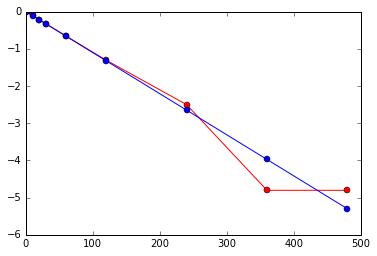

In [9]:
y2 = []
for i in range(9):
    y2.append(f.subs([(x, tdata[i])]))

import matplotlib.pyplot as plt
plt.plot(tdata2, y1, 'ro-', tdata2, y2, 'bo-')

#### Lab 3 Data

In [10]:
# define function
y = Function('y')
Cp, C_a0 = symbols('Cp C_a0')

y = ln(1 - Cp/C_a0)

# create array of y values substituting data#[i] for Cp and C_a0# for C_a0
y1 = []
for i in range(10):
    y1.append(y.subs([(C_a0, C_a03), (Cp, data3[i])]))

In [11]:
# calculate A.1-3 equations from given data
# assuming correct data types and same dimensions
sx = 0
for t in tdata:
    sx += t
sx = sx/len(tdata)

sxx = 0
for t in tdata:
    sxx += t**2
sxx = sxx/len(tdata)

sy = 0
for l in y1:
    sy += l
sy = sy/len(y1)

sxy = 0
for i in range(len(y1)):
    sxy += tdata[i] * y1[i]
sxy = sxy/len(tdata)

# find slope and intercept of best fit line (least squares)
# use equations A.1-4 and A.1-5
f = Function('f')
x = symbols('x')

a = (sxy - sx*sy)/(sxx - sx**2)
#b = (sxx*sy - sxy*sx)/(sxx - sx**2)
b = 0

# define and print function
f = a * x + b
f

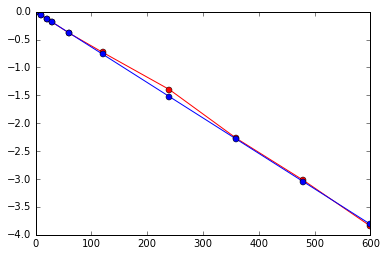

In [12]:
y2 = []
for i in range(10):
    y2.append(f.subs([(x, tdata[i])]))

import matplotlib.pyplot as plt
plt.plot(tdata, y1, 'ro-', tdata, y2, 'bo-')

#### Lab 4 Data

In [13]:
# define function
y = Function('y')
Cp, C_a0 = symbols('Cp C_a0')

y = ln(1 - Cp/C_a0)

# create array of y values substituting data#[i] for Cp and C_a0# for C_a0
y1 = []
for i in range(10):
    y1.append(y.subs([(C_a0, C_a04), (Cp, data4[i])]))

In [14]:
# calculate A.1-3 equations from given data
# assuming correct data types and same dimensions
sx = 0
for t in tdata:
    sx += t
sx = sx/len(tdata)

sxx = 0
for t in tdata:
    sxx += t**2
sxx = sxx/len(tdata)

sy = 0
for l in y1:
    sy += l
sy = sy/len(y1)

sxy = 0
for i in range(len(y1)):
    sxy += tdata[i] * y1[i]
sxy = sxy/len(tdata)

# find slope and intercept of best fit line (least squares)
# use equations A.1-4 and A.1-5
f = Function('f')
x = symbols('x')

a = (sxy - sx*sy)/(sxx - sx**2)
#b = (sxx*sy - sxy*sx)/(sxx - sx**2)
b = 0

# define and print function
f = a * x + b
f

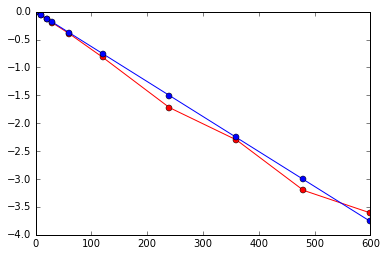

In [15]:
y2 = []
for i in range(10):
    y2.append(f.subs([(x, tdata[i])]))

import matplotlib.pyplot as plt
plt.plot(tdata, y1, 'ro-', tdata, y2, 'bo-')

(c) Use the results in part (b) to come up with a good estimate of the value of $k$ at 275C. Explain how you did it.

Take an average of all the values of $k$

In [16]:
klab1 = 0.00606662808569644
klab2 = 0.0110410880872567
klab3 = 0.00635210299104909
klab4 = 0.00626728915014607

# ignore lab 2, appears to be incorrect
print("kavg =", np.mean([klab1, klab3, klab4]))

kavg = 0.00622867340896


(d) If you did the calculation in part (b) correctly, one of the calculated values of $k$ should be considerably out of line with the others. Think of as many possible explanations for this result as you can (up to 10).

- Incorrectly measuring the concentration
- Variations in temperature (bad temp control)
- Taking samples at incorrect or slightly different times
- Poorly mixed substance (leading to misleading samples)
- Impurities present